In [5]:
import pandas as pd
import re


In [6]:
df = pd.read_csv("synthetic_woolworths_cleaned.csv")


In [7]:
columns_to_drop = ['Transaction ID', 'Customer ID', 'Item ID','Product Code',]  
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)


In [8]:
df.drop_duplicates(inplace=True)
print(df.columns.tolist())


['Purchase Date', 'Store Name', 'Location', 'Gender', 'Brand', 'Item Name', 'Category', 'Best Price', 'Unit Price', 'Discount Amount', 'Quantity', 'Total', 'Payment Type']


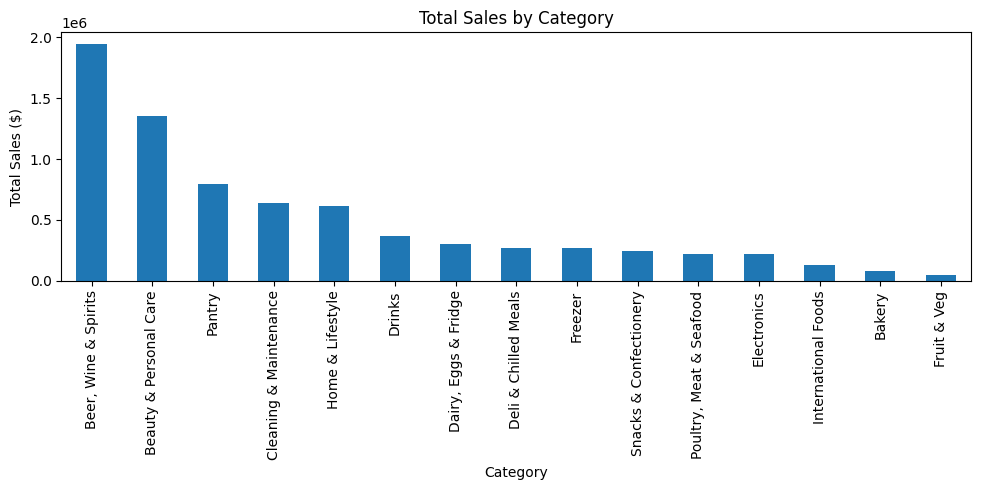

In [9]:
import matplotlib.pyplot as plt

category_sales = df.groupby('Category')['Total'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', title='Total Sales by Category', figsize=(10,5))
plt.ylabel('Total Sales ($)')
plt.xlabel('Category')
plt.tight_layout()
plt.show()


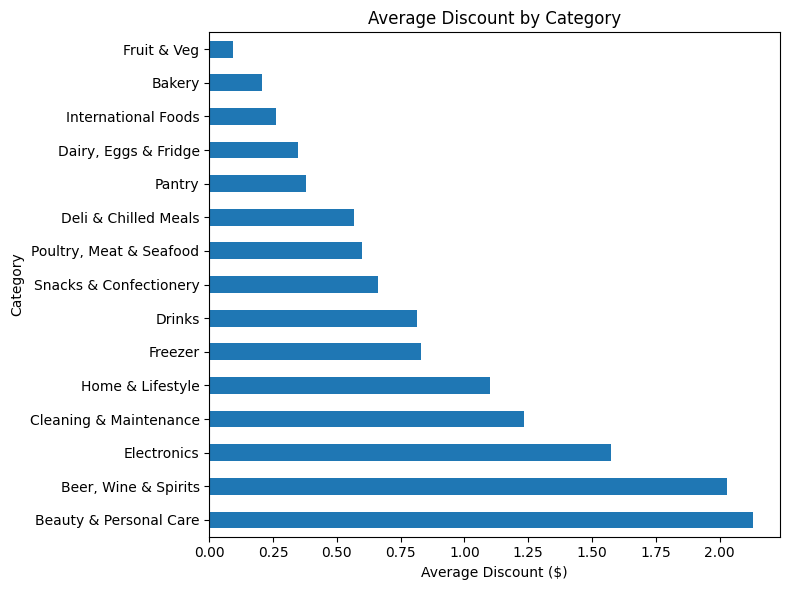

In [10]:
avg_discount = df.groupby('Category')['Discount Amount'].mean().sort_values(ascending=False)
avg_discount.plot(kind='barh', title='Average Discount by Category', figsize=(8,6))
plt.xlabel('Average Discount ($)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


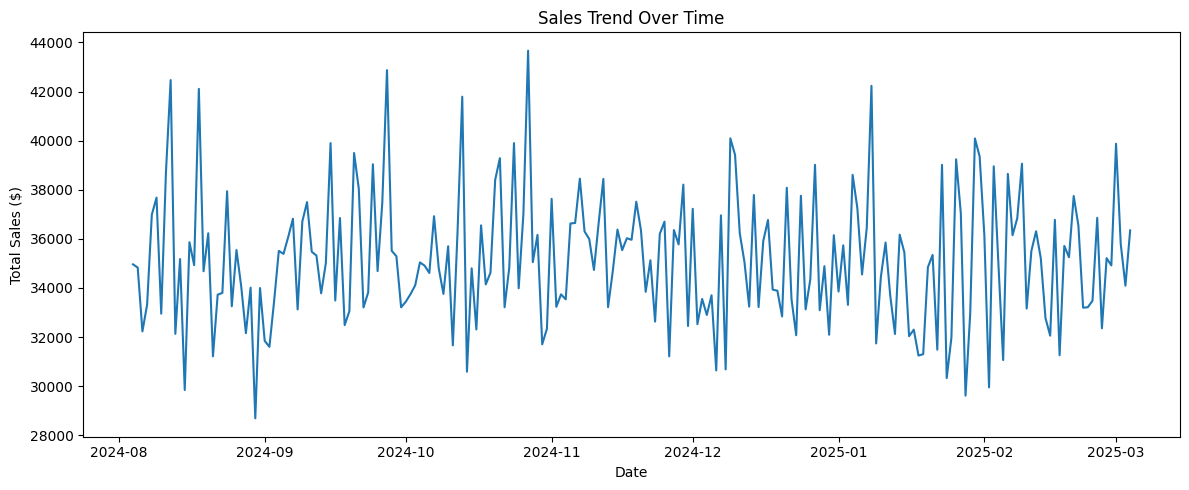

In [11]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
daily_sales = df.groupby(df['Purchase Date'].dt.date)['Total'].sum()

daily_sales.plot(title='Sales Trend Over Time', figsize=(12,5))
plt.ylabel('Total Sales ($)')
plt.xlabel('Date')
plt.tight_layout()
plt.show()


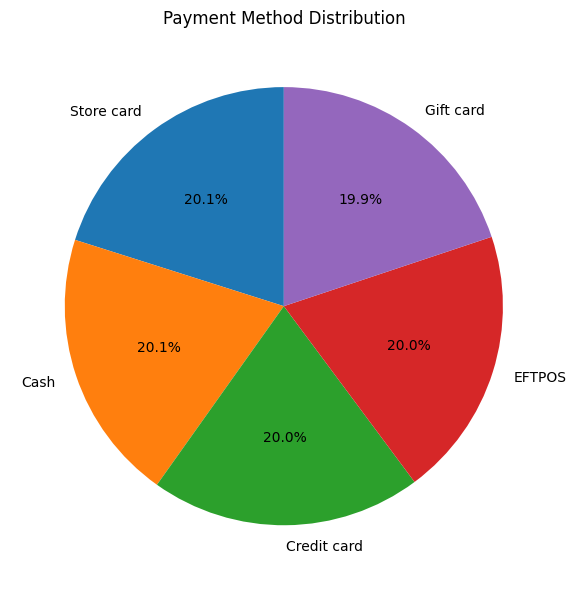

In [13]:
payment_counts = df['Payment Type'].value_counts()

payment_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), startangle=90)
plt.title('Payment Method Distribution')
plt.ylabel('')  # Remove y-label for cleaner pie chart
plt.tight_layout()
plt.show()


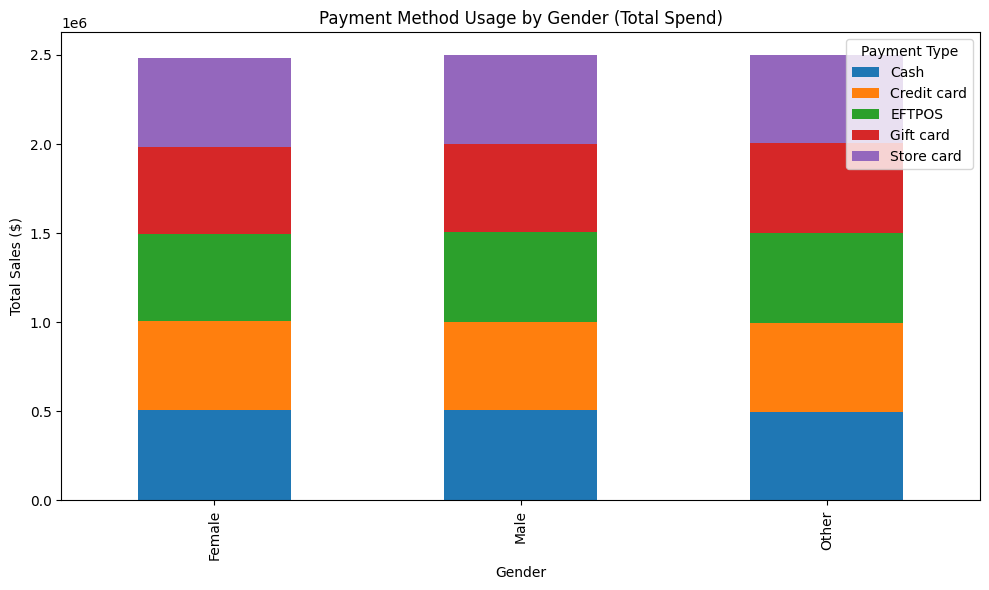

In [14]:
payment_by_gender = df.pivot_table(index='Gender', columns='Payment Type', values='Total', aggfunc='sum', fill_value=0)

payment_by_gender.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Payment Method Usage by Gender (Total Spend)')
plt.ylabel('Total Sales ($)')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()


In [15]:
# Save the cleaned and processed DataFrame
df.to_csv("custom_clean_dataset.csv", index=False)
print("Custom clean dataset saved as 'custom_clean_dataset.csv'")


Custom clean dataset saved as 'custom_clean_dataset.csv'


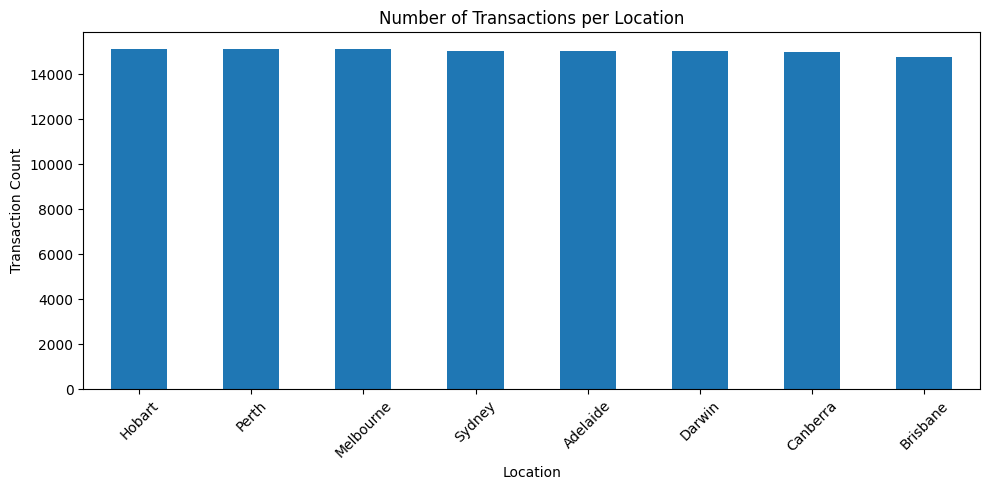

In [18]:
transaction_counts = df['Location'].value_counts()

ax = transaction_counts.plot(kind='bar', figsize=(10,5), title='Number of Transactions per Location')
ax.set_ylabel('Transaction Count')
ax.set_ylim(bottom=0)  # Start y-axis at 0
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


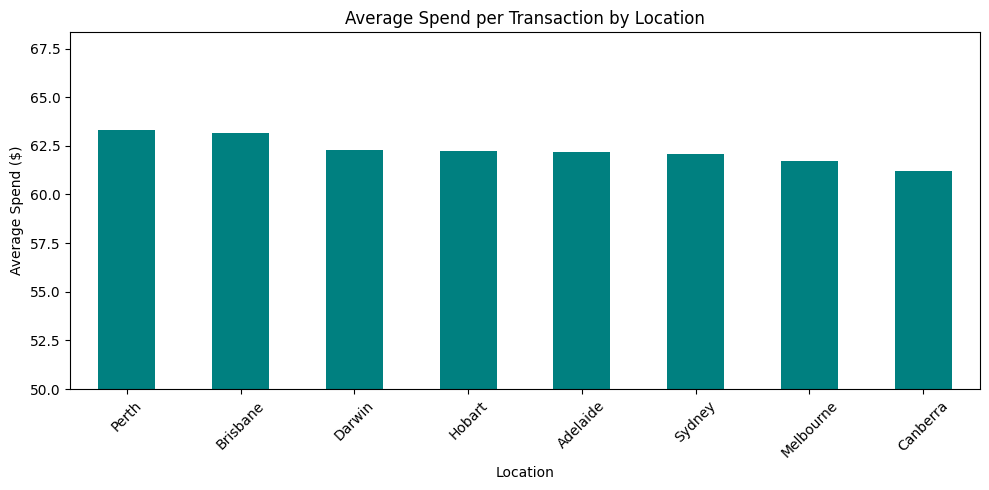

In [20]:
avg_spend = df.groupby('Location')['Total'].mean().sort_values(ascending=False)

ax = avg_spend.plot(kind='bar', figsize=(10,5), title='Average Spend per Transaction by Location', color='teal')
ax.set_ylabel('Average Spend ($)')
ax.set_ylim(50, avg_spend.max() + 5)  # Start y-axis at $50
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


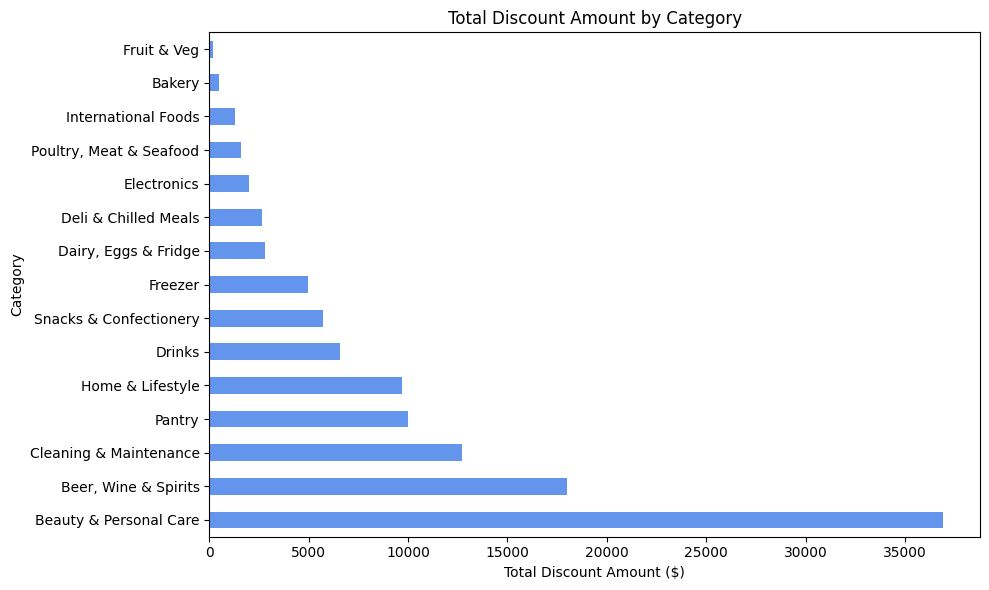

In [21]:
discount_by_category = df.groupby('Category')['Discount Amount'].sum().sort_values(ascending=False)

discount_by_category.plot(kind='barh', figsize=(10,6), title='Total Discount Amount by Category', color='cornflowerblue')
plt.xlabel('Total Discount Amount ($)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


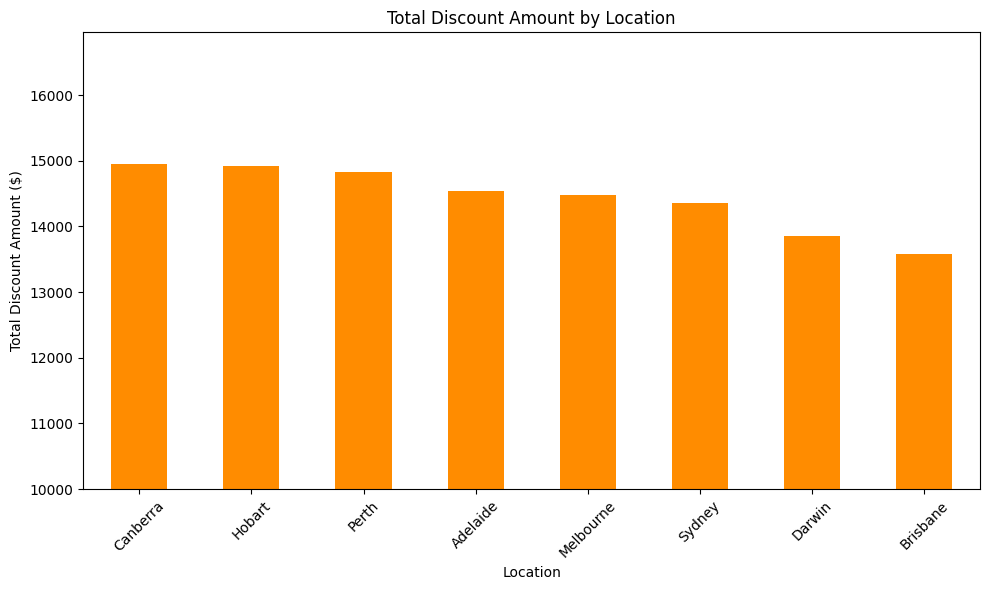

In [25]:
discount_by_location = df.groupby('Location')['Discount Amount'].sum().sort_values(ascending=False)

ax = discount_by_location.plot(kind='bar', figsize=(10,6), title='Total Discount Amount by Location', color='darkorange')
ax.set_ylabel('Total Discount Amount ($)')
ax.set_xlabel('Location')
ax.set_ylim(10000, discount_by_location.max() + 2000)  # Adjust lower bound as needed
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


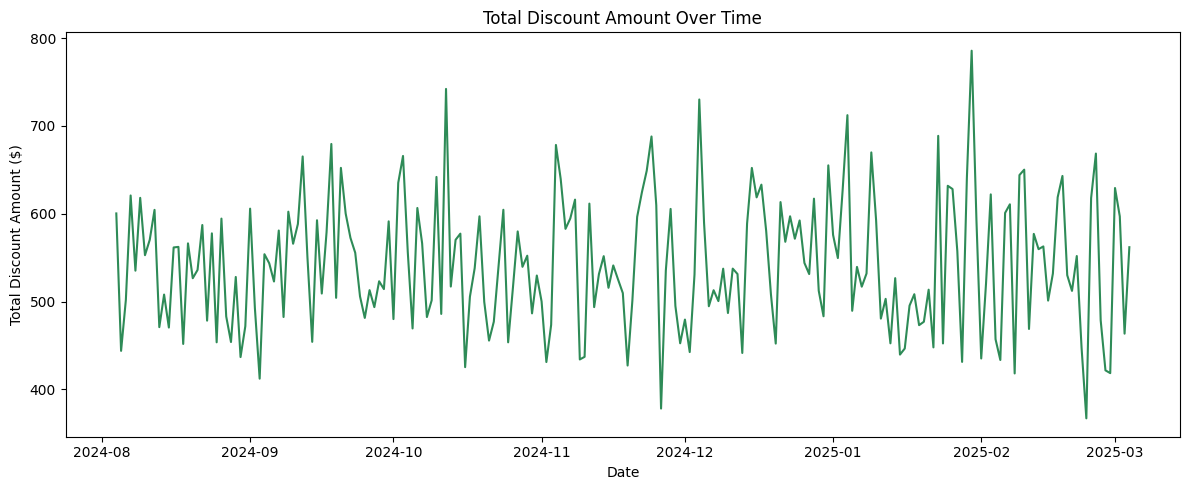

In [27]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])  # Ensure datetime format

discount_by_date = df.groupby(df['Purchase Date'].dt.date)['Discount Amount'].sum()

discount_by_date.plot(kind='line', figsize=(12,5), title='Total Discount Amount Over Time', color='seagreen')
plt.ylabel('Total Discount Amount ($)')
plt.xlabel('Date')
plt.tight_layout()
plt.show()
